# College Scorecard API in Python

by Michael T. Moen

**College Scorecard API documentation:** https://collegescorecard.ed.gov/data/documentation/

**College Scorecard Copyright Status:** https://www2.ed.gov/notices/copyright/index.html

<br>

The College Scorecard API is an online tool hosted by the U.S. Department of Education that contains data concerning higher education institutions.

These recipe examples were tested January 2024.

### API Key

An API key is required to access the College Scorecard API. This API key can be obtained [here](https://collegescorecard.ed.gov/data/documentation#api-key-signup).

In [3]:
key = ''

Alternatively, you can save the above data in a separate python file and import it:

In [4]:
from api_key import key

### Setup

This tutorial uses the following libraries:

In [33]:
import requests                     # manages API requests
from pprint import pprint           # creates more readable outputs
from time import sleep              # allows staggering of API requests to conform to rate limits
import pandas as pd                 # allows us to manage data in dataframes
import numpy as np                  # used in graphing data
import matplotlib.pyplot as plt     # creates graphs of our data

## 1. Get names of all institutions

To start, we'll use a basic query to find the names of all educational institutions recognized by the College Scorecard API.

All of the data for the API can be found using the `v1/schools` endpoint.

Fields in the College Scorecard API are accessed with a `<time>.<category>.<name>` sequence:
- `<time>` indicates the year of the data to be accessed. To access the most recent data, use `latest`.
- `<category>` and `<name>` can be found in the Data Dictionary file that can be downloaded from the API's documentation. The `<category>` of a field is given by the `dev-category` column in the `Institution_Data_Dictionary` section, and the `<name>` is given by the `developer-friendly name` column.

In [96]:
field = 'school.name'

url = f'http://api.data.gov/ed/collegescorecard/v1/schools?fields={field}&api_key={key}'

names = requests.get(url).json()

# display resulting metadata
names['metadata']

{'page': 0, 'total': 6543, 'per_page': 20}

The `total` value indicates the total number results returned in this query. These results are paginated, so each query will return only the number indicated by `page_size`, which has a default value of 20 and a maximum value of 100. The page number is indicated by `page`, which by default is set to 0.

We can use a loop to create an API request for each page:

In [97]:
field = 'school.name'
sort_key = 'school.name'
page_size = 100

# calculate the number of loops needed to page through every result based on the total number of results
url = f'http://api.data.gov/ed/collegescorecard/v1/schools?api_key={key}'
name_metadata = requests.get(url).json()['metadata']
total_pages = (name_metadata['total'] // page_size) + 1

institution_names = []

# loop through each page of the dataset, sending a request for each page
for page_number in range(total_pages):

    url = f'http://api.data.gov/ed/collegescorecard/v1/schools?fields={field}&page={page_number}&per_page={page_size}&sort={sort_key}&api_key={key}'

    name_data = requests.get(url).json()['results']

    for university in name_data:
        institution_names.append(university['school.name'])

    # wait 1 second between API calls to be nicer on the host servers
    sleep(1)

# display number of institution names found
len(institution_names)

6543

In [98]:
pprint(institution_names)

['A Better U Beauty Barber Academy',
 'A T Still University of Health Sciences',
 'Aaniiih Nakoda College',
 'ABC Adult School',
 'ABC Adult School - Cabrillo Lane',
 'ABC Beauty Academy',
 'ABCO Technology',
 'Abcott Institute',
 'Abilene Christian University',
 'Abilene Christian University-Undergraduate Online',
 'Abraham Baldwin Agricultural College',
 'Abraham Lincoln University',
 'Academia Serrant Inc',
 'Academy College',
 'Academy Di Capelli -',
 'Academy Di Capelli-School of Cosmetology',
 'Academy di Firenze',
 'Academy for Careers and Technology',
 'Academy for Five Element Acupuncture',
 'Academy for Jewish Religion-California',
 'Academy for Nursing and Health Occupations',
 'Academy for Salon Professionals',
 'Academy of Allied Health Careers',
 'Academy of Art University',
 'Academy of Beauty Professionals',
 'Academy of Beauty Professionals',
 'Academy of Beauty Professionals',
 'Academy of Beauty Professionals',
 'Academy of Career Training',
 'Academy of Careers and 

## 2. Get names of all universities

College Scorecard API requests can also take conditions to only select certain institutions.

In this example, we limit the results to only include institutions that award graduate degrees. In order to do this, we set the `degrees_awarded.highest` parameter to `4` to indicate that the highest degree awarded by an instition is a graduate degree. This information is within the `Institution_Data_Dictionary` section of the College Scorecard data disctionary.

In [99]:
condition = 'latest.school.degrees_awarded.highest=4'
field = 'school.name'
sort_key = 'school.name'
page_size = 100

# calculate the number of loops needed to page through every result based on the total number of results
url = f'http://api.data.gov/ed/collegescorecard/v1/schools?{condition}&fields={field}&api_key={key}'
name_metadata = requests.get(url).json()['metadata']
total_pages = (name_metadata['total'] // page_size) + 1

university_names = []

for page_number in range(total_pages):

    url = f'http://api.data.gov/ed/collegescorecard/v1/schools?{condition}&fields={field}&page={page_number}&per_page={page_size}&sort={sort_key}&api_key={key}'

    name_data = requests.get(url).json()['results']

    for university in name_data:
        university_names.append(university['school.name'])

    # wait 1 second between API calls to be nicer on the host servers
    sleep(1)

# display the number of university names found
len(university_names)

1974

In [100]:
pprint(university_names)

['A T Still University of Health Sciences',
 'Abilene Christian University',
 'Abraham Lincoln University',
 'Academy for Five Element Acupuncture',
 'Academy for Jewish Religion-California',
 'Academy of Art University',
 'Academy of Chinese Culture and Health Sciences',
 'Academy of Vocal Arts',
 'Acupuncture and Integrative Medicine College-Berkeley',
 'Acupuncture and Massage College',
 'Adams State University',
 'Adelphi University',
 'Adler Graduate School',
 'Adler University',
 'Adrian College',
 'AdventHealth University',
 'Agnes Scott College',
 'AI Miami International University of Art and Design',
 'Air Force Institute of Technology-Graduate School of Engineering & '
 'Management',
 'Alabama A & M University',
 'Alabama College of Osteopathic Medicine',
 'Alabama State University',
 'Alaska Pacific University',
 'Albany College of Pharmacy and Health Sciences',
 'Albany Law School',
 'Albany Medical College',
 'Albany State University',
 'Albert Einstein College of Medicine

## 3. Find number of universities by state

The `school.state_fips` data element contains a number that corresponds to each state. This mapping is given below:

In [103]:
states = {
    1:	'Alabama',
    2:	'Alaska',
    4:	'Arizona',
    5:	'Arkansas',
    6:	'California',
    8:	'Colorado',
    9:	'Connecticut',
    10:	'Delaware',
    11:	'District of Columbia',
    12:	'Florida',
    13:	'Georgia',
    15:	'Hawaii',
    16:	'Idaho',
    17:	'Illinois',
    18:	'Indiana',
    19:	'Iowa',
    20:	'Kansas',
    21:	'Kentucky',
    22:	'Louisiana',
    23:	'Maine',
    24:	'Maryland',
    25:	'Massachusetts',
    26:	'Michigan',
    27:	'Minnesota',
    28:	'Mississippi',
    29:	'Missouri',
    30:	'Montana',
    31:	'Nebraska',
    32:	'Nevada',
    33:	'New Hampshire',
    34:	'New Jersey',
    35:	'New Mexico',
    36:	'New York',
    37:	'North Carolina',
    38:	'North Dakota',
    39:	'Ohio',
    40:	'Oklahoma',
    41:	'Oregon',
    42:	'Pennsylvania',
    44:	'Rhode Island',
    45:	'South Carolina',
    46:	'South Dakota',
    47:	'Tennessee',
    48:	'Texas',
    49:	'Utah',
    50:	'Vermont',
    51:	'Virginia',
    53:	'Washington',
    54:	'West Virginia',
    55:	'Wisconsin',
    56:	'Wyoming',
    60:	'American Samoa',
    64:	'Federated States of Micronesia',
    66:	'Guam',
    69:	'Northern Mariana Islands',
    70:	'Palau',
    72:	'Puerto Rico',
    78:	'Virgin Islands'
}

Using this mapping, we can find the number of universities in each state:

In [127]:
condition = 'latest.school.degrees_awarded.highest=4'
field = 'latest.school.state_fips'
page_size = 100

# calculate the number of loops needed to page through every result based on the total number of results
url = f'http://api.data.gov/ed/collegescorecard/v1/schools?{condition}&fields={field}&api_key={key}'
name_metadata = requests.get(url).json()['metadata']
total_pages = (name_metadata['total'] // page_size) + 1

state_freq = {}

for page_number in range(total_pages):

    url = f'http://api.data.gov/ed/collegescorecard/v1/schools?{condition}&fields={field}&page={page_number}&per_page={page_size}&api_key={key}'

    state_data = requests.get(url).json()['results']

    for university in state_data:
        state = states[str(university['latest.school.state_fips'])]
        state_freq[state] = state_freq.get(state, 0) + 1
    
    # wait 1 second between API calls to be nicer on the host servers
    sleep(1)

Now, we can sort and display the results:

In [148]:
sorted_states = sorted(state_freq.items(), key=lambda x: x[1], reverse=True)

for state_name, num_universities in sorted_states:
    print(f'{state_name}: {num_universities}')

California: 209
New York: 151
Pennsylvania: 110
Texas: 103
Illinois: 82
Florida: 73
Massachusetts: 73
Ohio: 69
Missouri: 57
North Carolina: 53
Virginia: 52
Puerto Rico: 49
Indiana: 49
Tennessee: 48
Georgia: 47
Michigan: 46
Wisconsin: 40
Minnesota: 38
New Jersey: 38
South Carolina: 31
Alabama: 30
Colorado: 29
Maryland: 29
Oregon: 28
Washington: 28
Connecticut: 27
Iowa: 27
Kentucky: 27
Louisiana: 26
Kansas: 25
Oklahoma: 25
Arizona: 23
Nebraska: 20
West Virginia: 19
Arkansas: 19
Mississippi: 16
District of Columbia: 16
South Dakota: 15
Vermont: 14
New Hampshire: 12
Utah: 12
Rhode Island: 12
New Mexico: 12
Maine: 12
North Dakota: 11
Nevada: 9
Montana: 8
Hawaii: 7
Idaho: 6
Delaware: 5
Alaska: 4
Guam: 1
Virgin Islands: 1
Wyoming: 1


## 4. Retrieving multiple data points in a single query

The following example uses multiple conditions and multiple fields. The conditions in the query are separated by `&` while the fields are separated by `,`.

In [174]:
# use .join to add '&' between the elements in the list of conditions
conditions = '&'.join([
    'latest.school.degrees_awarded.highest=4',
    'latest.student.size__range=1000..'  # limit results to schools with 1000 or more students
])

# use .join to add ',' between the elements in the list of fields
fields = ','.join([
    'school.name',
    'latest.admissions.admission_rate.overall',
    'latest.student.size',
    'latest.cost.tuition.out_of_state',
    'latest.cost.tuition.in_state',
    'latest.student.demographics.median_hh_income',
    'latest.school.endowment.begin'
])
page_size = 100
sort_key = 'school.name'

# calculate the number of loops needed to page through every result based on the total number of results
url = f'http://api.data.gov/ed/collegescorecard/v1/schools?{conditions}&fields={fields}&api_key={key}'
name_metadata = requests.get(url).json()['metadata']
total_pages = (name_metadata['total'] // page_size) + 1

rows = []

for page_number in range(total_pages):

    url = f'http://api.data.gov/ed/collegescorecard/v1/schools?{conditions}&fields={fields}&page={page_number}&per_page={page_size}&sort={sort_key}&api_key={key}'

    api_data = requests.get(url).json()['results']

    for university in api_data:
        row = [
            university['school.name'],
            university['latest.admissions.admission_rate.overall'],
            university['latest.student.size'],
            university['latest.cost.tuition.out_of_state'],
            university['latest.cost.tuition.in_state'],
            university['latest.student.demographics.median_hh_income'],
            university['latest.school.endowment.begin']
        ]
        rows.append(row)
    
    # wait 1 second between API calls to be nicer on the host servers
    sleep(1)

columns = ['Name', 'Admission Rate', 'Size', 'Tuition Out of State', 'Tuition In State', 'Median Household Income', 'Endowment']
df = pd.DataFrame(rows, columns=columns)

# display the dataframe
df

,Name,Admission Rate,Enrollment,Tuition Out of State,Tuition In State,Median Household Income,Endowment
0,Abilene Christian University,0.7011,3131,39350.0,39350.0,67136.0,4.435726e+08
1,Academy of Art University,NaN,5294,25424.0,25424.0,74015.0,NaN
2,Adams State University,0.9983,1484,17933.0,9680.0,50726.0,6.212400e+04
3,Adelphi University,0.7746,5168,42475.0,42475.0,80864.0,2.024480e+08
4,Adrian College,0.7599,1741,39107.0,39107.0,66915.0,3.618587e+07
...,...,...,...,...,...,...,...
1148,Xavier University of Louisiana,0.9541,2727,26398.0,26398.0,55657.0,1.470400e+08
1149,Yale University,0.0531,6535,59950.0,59950.0,75345.0,3.120169e+10
1150,Yeshiva University,0.6270,2583,47500.0,47500.0,78671.0,4.745080e+08
1151,York College of Pennsylvania,0.7769,3452,22350.0,22350.0,73378.0,1.507606e+08


We can query the resulting dataframe to find the data for specific universities:

In [185]:
df[df['Name'] == 'The University of Alabama']

,Name,Admission Rate,Enrollment,Tuition Out of State,Tuition In State,Median Household Income,Endowment
836,The University of Alabama,0.789,30725,31090.0,11620.0,57928.0,939393269.0


We can also query the dataframe to find the data for universities that satisfy certain conditions:

In [186]:
df[df['Admission Rate'] < 0.1]

,Name,Admission Rate,Enrollment,Tuition Out of State,Tuition In State,Median Household Income,Endowment
97,Brown University,0.0551,7125,62304.0,62304.0,79027.0,4.377466e+09
192,Columbia University in the City of New York,0.0413,8832,63530.0,63530.0,76971.0,1.125702e+10
203,Cornell University,0.0869,15451,61015.0,61015.0,80346.0,6.882708e+09
222,Dartmouth College,0.0617,4533,60870.0,60870.0,79834.0,5.975180e+09
243,Duke University,0.0589,6815,60244.0,60244.0,78468.0,8.474071e+09
347,Harvard University,0.0401,7938,55587.0,55587.0,76879.0,4.189438e+10
397,Johns Hopkins University,0.0752,5727,58720.0,58720.0,81539.0,6.750092e+09
475,Massachusetts Institute of Technology,0.0411,4629,55878.0,55878.0,77426.0,1.838152e+10
586,Northwestern University,0.0697,8691,60768.0,60768.0,81811.0,8.484706e+09
632,Princeton University,0.0438,5236,56010.0,56010.0,81428.0,2.594428e+10


In [189]:
df[df['Endowment'] > 1.0e+10]

,Name,Admission Rate,Enrollment,Tuition Out of State,Tuition In State,Median Household Income,Endowment
192,Columbia University in the City of New York,0.0413,8832,63530.0,63530.0,76971.0,1.125702e+10
347,Harvard University,0.0401,7938,55587.0,55587.0,76879.0,4.189438e+10
475,Massachusetts Institute of Technology,0.0411,4629,55878.0,55878.0,77426.0,1.838152e+10
632,Princeton University,0.0438,5236,56010.0,56010.0,81428.0,2.594428e+10
763,Stanford University,0.0395,7645,56169.0,56169.0,80275.0,2.894811e+10
812,Texas A & M University-College Station,0.6428,56006,40134.0,13239.0,67194.0,1.273407e+10
963,University of Michigan-Ann Arbor,0.2015,32063,53232.0,16178.0,77145.0,1.214471e+10
1002,University of Notre Dame,0.1507,8950,58843.0,58843.0,76710.0,1.231942e+10
1005,University of Pennsylvania,0.0587,10644,61710.0,61710.0,78252.0,1.487736e+10
1149,Yale University,0.0531,6535,59950.0,59950.0,75345.0,3.120169e+10


## 5. Retrieving all data for an institution

The College Scorecard API can also be used to retrieve all of the data for a particular institution. The example below finds all data for The University of Alabama:

In [ ]:
# the text in the condition must be URL encoded
condition = 'school.name=The%20University%20of%20Alabama'

url = f'http://api.data.gov/ed/collegescorecard/v1/schools?{condition}&api_key={key}'

api_data = requests.get(url).json()

# output removed since it is too long
# pprint(api_data)

Finally, we'll look at the breakdown of size of each program at the University of Alabama:

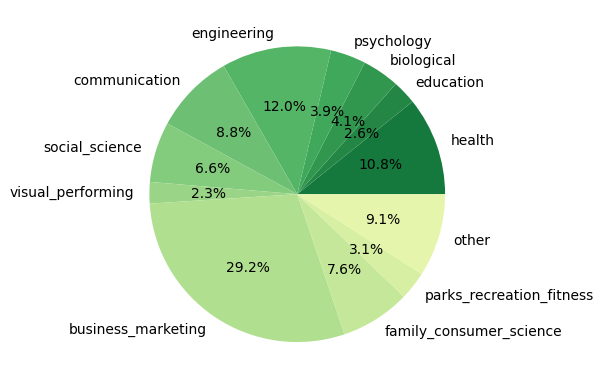

In [40]:
program_percentage_data = api_data['results'][0]['latest']['academics']['program_percentage']
programs = list(program_percentage_data.keys())
percentages = list(program_percentage_data.values())

smallest_percent_allowed = 0.015 # any sector under this threshold will be combined into an "other" category in the pie chart
small_slices = 0 # the number of slices below the threshold above

# count the number of small slices
small_slices = sum(1 for i in percentages if i < smallest_percent_allowed)

# if there is more than one slice smaller than the threshold specified above, this combines those slices into an "other" slice
if small_slices > 1:
    other_percentage = 0
    i = len(program_percentage_data)-1
    while i >= 0:
        if percentages[i] < smallest_percent_allowed:
            other_percentage += percentages[i]
            programs.pop(i)
            percentages.pop(i)
        i -= 1
    percentages.append(other_percentage)
    programs.append("other")

# configure color of pie chart
cmap = plt.get_cmap('YlGn_r')
colors = cmap(np.linspace(0.2, 0.8, len(percentages)))

fig, ax = plt.subplots()
plt.pie(percentages, labels=programs, autopct='%1.1f%%', colors=colors)
# plt.title("Subagency Obligations of the " + agency_name)

plt.show()

In [43]:
# sort the dictionary by keys
sorted_program_percentage_data = dict(sorted(program_percentage_data.items(), key=lambda x: x[1], reverse=True))

# print the sorted dictionary
for key, value in sorted_program_percentage_data.items():
    print(f'{key}: {value}')

business_marketing: 0.2916
engineering: 0.1198
health: 0.1077
communication: 0.0877
family_consumer_science: 0.0763
social_science: 0.0661
biological: 0.0406
psychology: 0.0386
parks_recreation_fitness: 0.0311
education: 0.0262
visual_performing: 0.0234
computer: 0.0148
multidiscipline: 0.0133
english: 0.0102
history: 0.0096
mathematics: 0.0088
physical_science: 0.0087
public_administration_social_service: 0.0072
language: 0.0069
resources: 0.0061
philosophy_religious: 0.0033
ethnic_cultural_gender: 0.0019
legal: 0
library: 0
military: 0
humanities: 0
agriculture: 0
architecture: 0
construction: 0
transportation: 0
personal_culinary: 0
science_technology: 0
precision_production: 0
engineering_technology: 0
security_law_enforcement: 0
communications_technology: 0
mechanic_repair_technology: 0
theology_religious_vocation: 0
